In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sign(p):
    if p > 0.0:
        return 1.0
    else:
        return -1.0

In [3]:
def generate_data(N = 20):
    X = np.random.uniform(-1.0, 1.0, N)
    X = np.sort(X)
    Y = []
    for item in X:
        temp = sign(item)
        if np.random.randint(5) == 0:  # noise
            temp = -temp
        Y.append(temp)
    return X, Y

In [4]:
def h(X, s, theta):
    return s*np.sign(X-theta)
def cnt_Ein(X, s, theta, Y):
    return np.sum(h(X, s, theta) != Y)/len(X)

In [5]:
def cal_err(X, Y):
    theta_set = [-1.0]
    x_len = len(X) - 1
    for i in range(x_len):
        theta_set.append((X[i]+X[i+1])/2)
    theta_set.append(1.0)
    min_Ein = len(X) + 1.0
    Eout = 0.0
    for s in [-1.0, 1.0]:
        for theta in theta_set:
            ein = cnt_Ein(X, s, theta, Y)
            if ein < min_Ein:
                min_Ein = ein
                Eout = 0.5 + 0.3*s*(abs(theta)-1) 
    return min_Ein, Eout

In [6]:
ein_set = []
eout_set = []
for _ in range(1000):
    data_X, data_Y = generate_data()
    ein, eout = cal_err(data_X, data_Y)
    ein_set.append(ein)
    eout_set.append(eout)


In [7]:
print(np.mean(ein_set))
print(np.mean(eout_set))

0.16675
0.259257599942


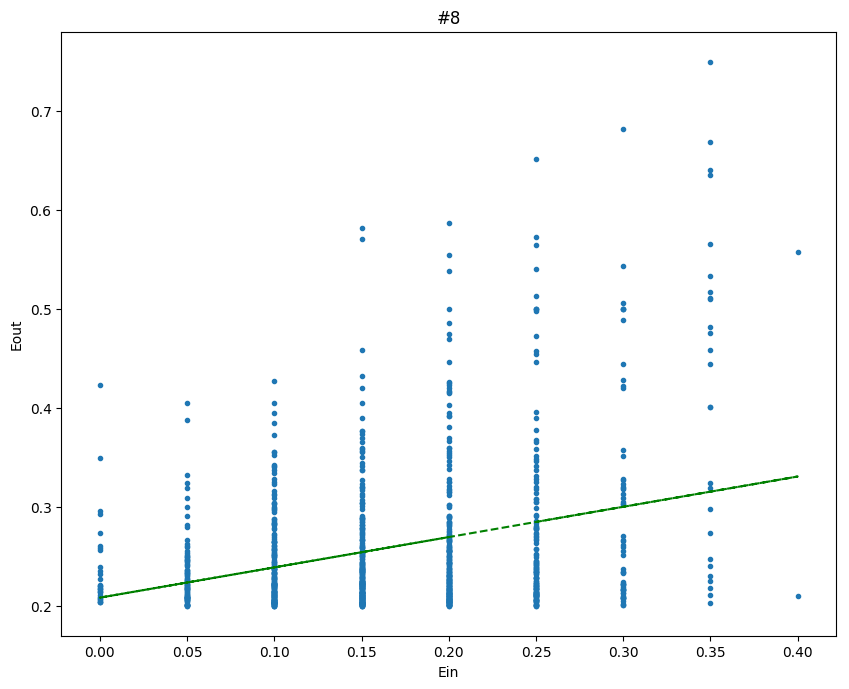

In [24]:
plt.figure(figsize=(10,8), dpi = 100) 
plt.scatter(ein_set, eout_set, marker = '.')
plt.title("#8")
plt.xlabel('Ein') 
plt.ylabel('Eout')
z = np.polyfit(ein_set, eout_set, 1)
p = np.poly1d(z)
plt.plot(ein_set,p(ein_set),"g--")
plt.show()